# Laboratorio 2: Regresión

In [1]:
import numpy as np
import pandas as pd

from joblib import dump, load

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler



import scipy.stats as stats

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)

In [3]:
df_vehiculos = pd.read_csv('./data/MotorAlpes_data.csv', sep=',', encoding = 'utf-8')

In [4]:
df_vehiculos.shape

(7115, 12)

In [5]:
df_vehiculos.sample(5)

,Unnamed: 0,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
5399,6169,2015.0,110000.0,First Owner,Individual,7.0,Diesel,Manual,14.10,2179.0,147.94,6094.02
2982,3410,2017.0,45000.0,First Owner,Dealer,5.0,Diesel,Automatic,19.33,1999.0,177.00,38769.08
1026,1165,2011.0,NaN,Third Owner,Individual,5.0,Diesel,Manual,NaN,2179.0,115.00,4240.37
4649,5308,2017.0,39000.0,First Owner,Individual,5.0,Petrol,Manual,17.01,1591.0,121.30,9086.50
2046,2334,2012.0,35000.0,First Owner,Individual,5.0,Diesel,Manual,23.03,NaN,NaN,3137.87


## 1. Entendimiento de los datos 

# Analisis de los datos

En terminos de completitud, notamos que hay un total de 1823 nulos entre todas las columnas, es decir un 2.13% de total de los datos que son 85380.
Seria bueno cambiar esos nulos por la media de los datos, porque es un número siginificativo de nulos que pueden afectar la regresión.

La unicidad, que habla sobre los valores unicos sin repetición que hay en el dataframe podemos ver que hay una gran cantidad de valores repetidos. 
Hay unicamente 10100 valores unicos de l total de 85380, siendo un 11,82% de los datos. Es decir 88.17% de los datos aparecen mas de una vez. 

La consistencia de los datos se pueden medir con varios factores. El pricipal es si la comluna respeta el tipo de dato. En todos los casos hay uniformidad
en cuanto al tipo de dato. Tambien, se hace un analisis de valores atipicos, notando que en la mayoria de columnas hay valores atipicos que en un futuro
hay que tratarlos

Por ultimo, la validez de los datos en cuanto a si cumplen con alguna restricción se puede decir que no hay alguna columna con datos que tengan
datos fuera de lo comun y que no pertenezcan a a la categoria donde se ecnuentran, afectando la coherencia y confiabilidad de los datos.

A continuación, se encuentra la justificación de cada uno de los items: 


In [65]:
print(df_vehiculos_t.isnull().sum())

Unnamed: 0         0
year             239
km_driven        198
owner            239
seller_type        0
seats              0
fuel               0
transmission       0
mileage          198
engine           280
max_power        268
selling_price    401
dtype: int64


In [67]:
print(df_vehiculos_t.nunique())

Unnamed: 0       7115
year               27
km_driven         831
owner               5
seller_type         3
seats               9
fuel                4
transmission        2
mileage           381
engine            392
max_power         617
selling_price     714
dtype: int64
10100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7115 non-null   int64  
 1   year           6876 non-null   float64
 2   km_driven      6917 non-null   float64
 3   owner          6876 non-null   float64
 4   seller_type    7115 non-null   int64  
 5   seats          7115 non-null   float64
 6   fuel           7115 non-null   int64  
 7   transmission   7115 non-null   int32  
 8   mileage        6917 non-null   float64
 9   engine         6835 non-null   float64
 10  max_power      6847 non-null   float64
 11  selling_price  6714 non-null   fl

In [68]:
print(df_vehiculos_t.nunique().sum())



10100
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7115 non-null   int64  
 1   year           6876 non-null   float64
 2   km_driven      6917 non-null   float64
 3   owner          6876 non-null   float64
 4   seller_type    7115 non-null   int64  
 5   seats          7115 non-null   float64
 6   fuel           7115 non-null   int64  
 7   transmission   7115 non-null   int32  
 8   mileage        6917 non-null   float64
 9   engine         6835 non-null   float64
 10  max_power      6847 non-null   float64
 11  selling_price  6714 non-null   float64
dtypes: float64(8), int32(1), int64(3)
memory usage: 639.4 KB
None


In [69]:
print(df_vehiculos_t.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7115 entries, 0 to 7114
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     7115 non-null   int64  
 1   year           6876 non-null   float64
 2   km_driven      6917 non-null   float64
 3   owner          6876 non-null   float64
 4   seller_type    7115 non-null   int64  
 5   seats          7115 non-null   float64
 6   fuel           7115 non-null   int64  
 7   transmission   7115 non-null   int32  
 8   mileage        6917 non-null   float64
 9   engine         6835 non-null   float64
 10  max_power      6847 non-null   float64
 11  selling_price  6714 non-null   float64
dtypes: float64(8), int32(1), int64(3)
memory usage: 639.4 KB
None


In [70]:

q1 = df_vehiculos_t.quantile(0.25)
q3 = df_vehiculos_t.quantile(0.75)
iqr = q3 - q1
print(df_vehiculos_t[(df_vehiculos_t < (q1 - 1.5 * iqr)) | (df_vehiculos_t > (q3 + 1.5 * iqr))].count())

Unnamed: 0          0
year              139
km_driven         183
owner             142
seller_type      1224
seats            1466
fuel               32
transmission      948
mileage            64
engine            950
max_power         702
selling_price     539
dtype: int64


## 2.  Entendimiento y limpieza de los datos

### 2.1 Descripción del proceso de identificación de variables
A partir del análisis del contexto, de la descripción del negocio de MotorAlpes y teniendo en cuenta que el objetivo es asegurar que los precios sean justos y coherentes con las características principales y el estado de los vehículos que se venden consideramos en primera medida que las variables que utilizaremos para la creación de los modelos serán year, km_driven, seats, milage, engine, max_power, transmisión y owner. Lo anterior es debido a que primero, son variables que seguramente tienen un impacto significativo sobre la variable objetivo (selling_price) y nos permitirán generar relaciones lineales entre ellas a partir de las cuales podremos interpretar y concluir aspectos de gran importancia para el negocio de MotorAlpes.  Por otro lado, estas variables también fueron elegidas por que no tienen una alta correlación entre si con lo cual se evita la multicolinealidad que podría afectar los resultados del modelo.


In [6]:
variables_interes = ['year', 'km_driven', 'seats', 'mileage', 'engine','max_power','transmission','owner']

df_vehiculos_t = df_vehiculos.copy()

In [7]:
df_vehiculos_t[['selling_price'] + variables_interes].isnull().sum() / df_vehiculos_t.shape[0]

selling_price    0.056360
year             0.033591
km_driven        0.027829
seats            0.000000
mileage          0.027829
engine           0.039353
max_power        0.037667
transmission     0.000000
owner            0.033591
dtype: float64

In [8]:
df_vehiculos_t['owner'].value_counts()

First Owner             4520
Second Owner            1773
Third Owner              441
Fourth & Above Owner     138
Test Drive Car             4
Name: owner, dtype: int64

In [9]:
df_vehiculos_t['seller_type'].value_counts()

Individual          5891
Dealer              1008
Trustmark Dealer     216
Name: seller_type, dtype: int64

In [10]:
df_vehiculos_t['fuel'].value_counts()

Diesel    3843
Petrol    3192
CNG         48
LPG         32
Name: fuel, dtype: int64

### 2.3 Limpieza de datos: Cambio de valores categoricos a variables númericas.
- Este proceso se hace para las variables owner, seller_type, fuel y transmission 

In [11]:
def chg_owner (df_vehiculos_t):

    df_vehiculos_t ['owner']=df_vehiculos_t['owner'].replace('First Owner',0) 
    df_vehiculos_t ['owner']=df_vehiculos_t['owner'].replace('Second Owner',1) 
    df_vehiculos_t ['owner']=df_vehiculos_t['owner'].replace('Third Owner',2) 
    df_vehiculos_t ['owner']=df_vehiculos_t['owner'].replace('Fourth & Above Owner',3) 
    df_vehiculos_t ['owner']=df_vehiculos_t['owner'].replace('Test Drive Car',4) 


    df_vehiculos_t['owner'].value_counts()
    return df_vehiculos_t



In [12]:
def chg_sellertp(df_vehiculos_t):


    df_vehiculos_t ['seller_type']=df_vehiculos_t['seller_type'].replace('Individual',0) 
    df_vehiculos_t ['seller_type']=df_vehiculos_t['seller_type'].replace('Dealer',1) 
    df_vehiculos_t ['seller_type']=df_vehiculos_t['seller_type'].replace('Trustmark Dealer',2) 

    df_vehiculos_t['seller_type'].value_counts()
    return df_vehiculos_t


In [13]:
def chg_fuel (df_vehiculos_t):
    df_vehiculos_t ['fuel']=df_vehiculos_t['fuel'].replace('Diesel',0) 
    df_vehiculos_t ['fuel']=df_vehiculos_t['fuel'].replace('Petrol',1) 
    df_vehiculos_t ['fuel']=df_vehiculos_t['fuel'].replace('CNG',2) 
    df_vehiculos_t ['fuel']=df_vehiculos_t['fuel'].replace('LPG',3) 


    df_vehiculos_t['fuel'].value_counts()
    return df_vehiculos_t

In [14]:
def chg_transmision(df_vehiculos_t):
    encoder = LabelEncoder()
    df_vehiculos_t["transmission"] = encoder.fit_transform(df_vehiculos_t["transmission"])
    print(encoder.classes_)

    df_vehiculos_t.sample(5)
    return df_vehiculos_t

In [15]:
def cat_num(df_vehiculos_t):
    df_vehiculos_t =chg_owner(df_vehiculos_t)
    df_vehiculos_t= chg_transmision(df_vehiculos_t)
    df_vehiculos_t=chg_sellertp(df_vehiculos_t)
    df_vehiculos_t= chg_fuel(df_vehiculos_t)
    return df_vehiculos_t


df_vehiculos_t= cat_num(df_vehiculos_t)
    

['Automatic' 'Manual']


### 2.2 Relaciones entre variables
A continuación vamos a visualizar la correlación entre selling price y las variables de interes.

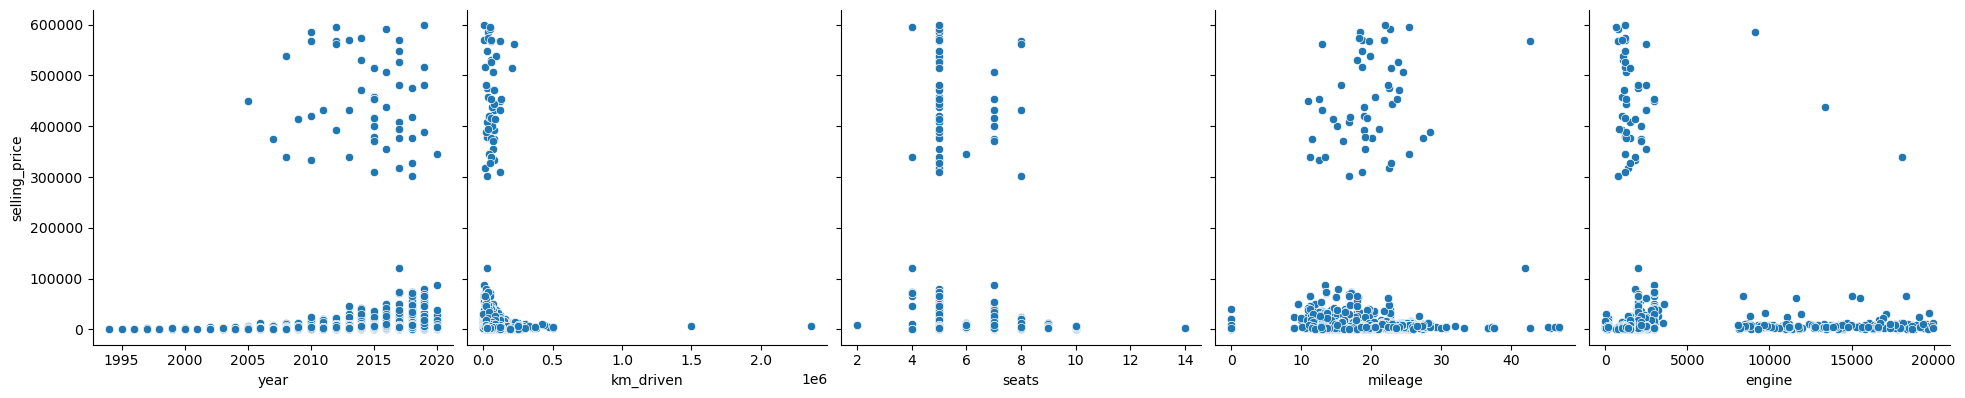

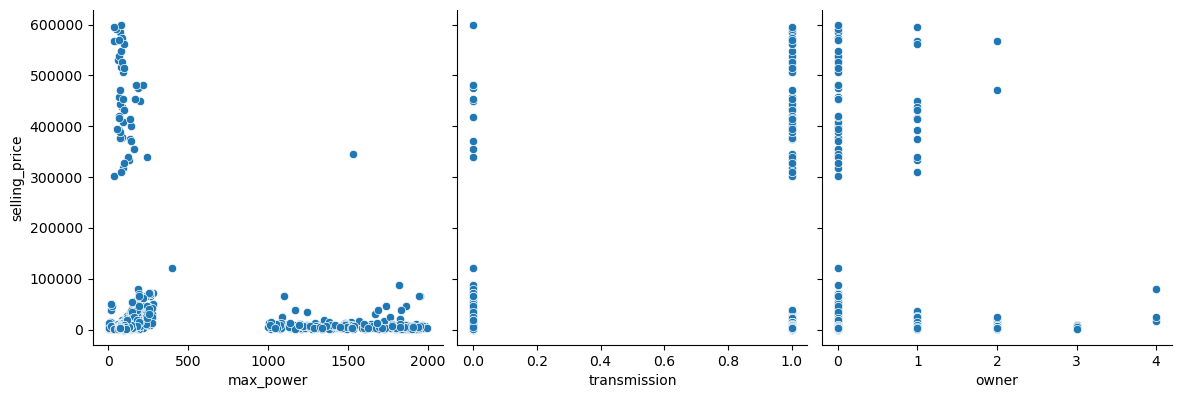

In [16]:

sns.pairplot(df_vehiculos_t, height = 4, y_vars = 'selling_price', x_vars = ['year', 'km_driven', 'seats', 'mileage', 'engine'], kind = 'scatter')
plt.show()
sns.pairplot(df_vehiculos_t, height = 4, y_vars = 'selling_price', x_vars = ['max_power','transmission','owner'], kind = 'scatter')
plt.show()

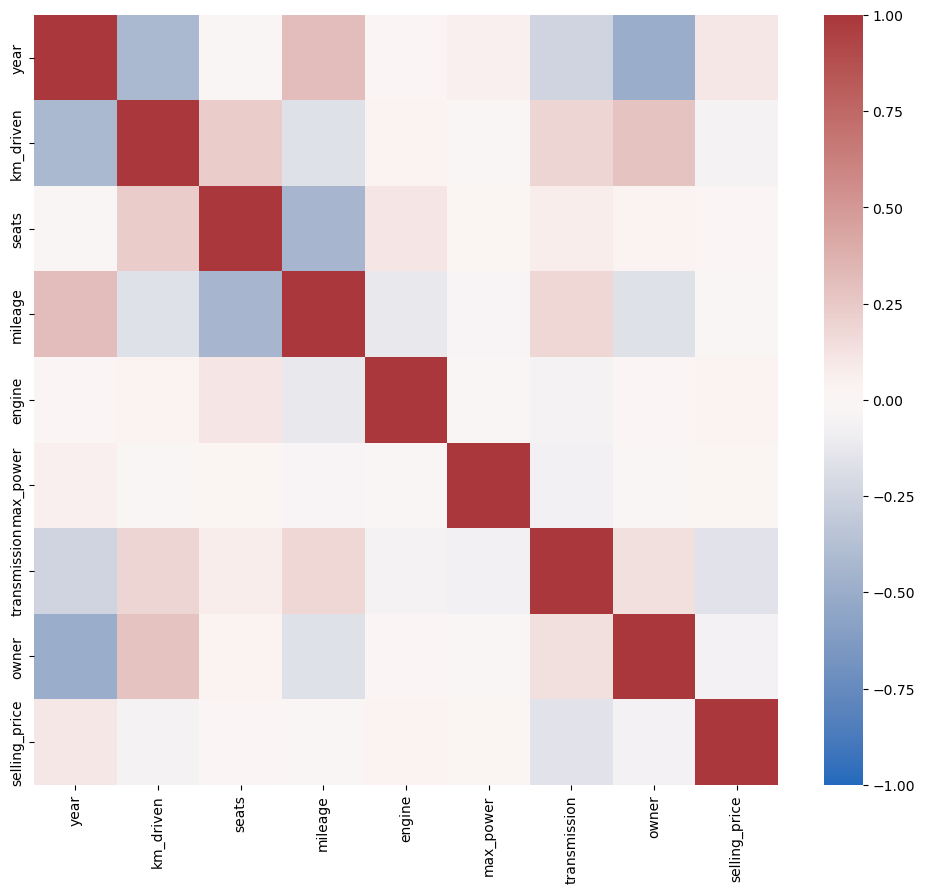

In [171]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_vehiculos_t[variables_interes+['selling_price']].corr(), cmap = 'vlag', vmin = -1, vmax = 1)
plt.show()

In [18]:
df_vehiculos_copy = df_vehiculos_t.copy()

### 2.3.1 Limpieza de datos: Cambio de los valores nulos 
Por medio de las funciones fill_na_all se cambia los valores nulos por la media. Eso mismo para con fill_na_price solo que a la columna con el nombre selling_price.


In [19]:
def fill_na_all(df):
    var_to_transform= ['year', 'km_driven', 'seats', 'mileage', 'engine','max_power','owner']
    for i in var_to_transform:
        mean = df[i].mean()
        df[i]=df[i].fillna(mean)
    
    return df
        

In [20]:
def fill_na_price(df):

    mean = df['selling_price'].mean()
    df['selling_price']=df['selling_price'].fillna(mean)
    return df

In [21]:
df_vehiculos_copy= fill_na_price(df_vehiculos_copy)
df_vehiculos_copy= fill_na_all(df_vehiculos_copy)
data_tercer_modelo = df_vehiculos_copy.copy()


In [22]:
df_vehiculos_copy.sample(5)
df_vehiculos_copy[['selling_price'] + variables_interes].isnull().sum() / df_vehiculos_copy.shape[0]
#Se muestra que se ha pasado los nulos a valores promedio

selling_price    0.0
year             0.0
km_driven        0.0
seats            0.0
mileage          0.0
engine           0.0
max_power        0.0
transmission     0.0
owner            0.0
dtype: float64

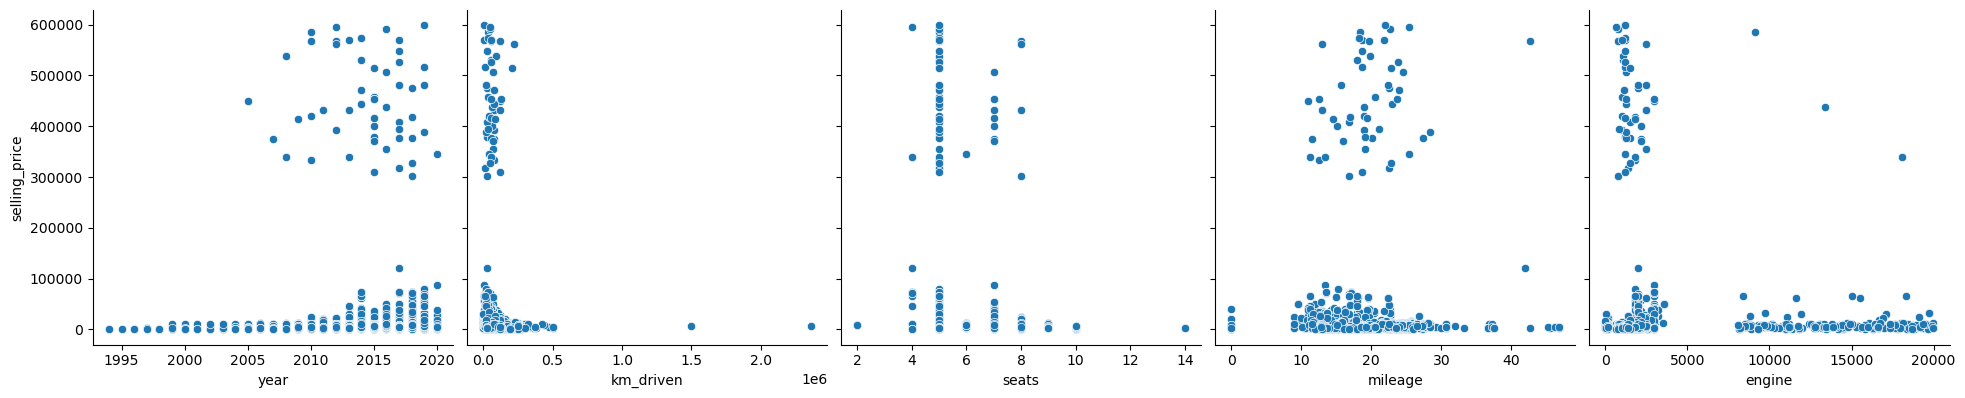

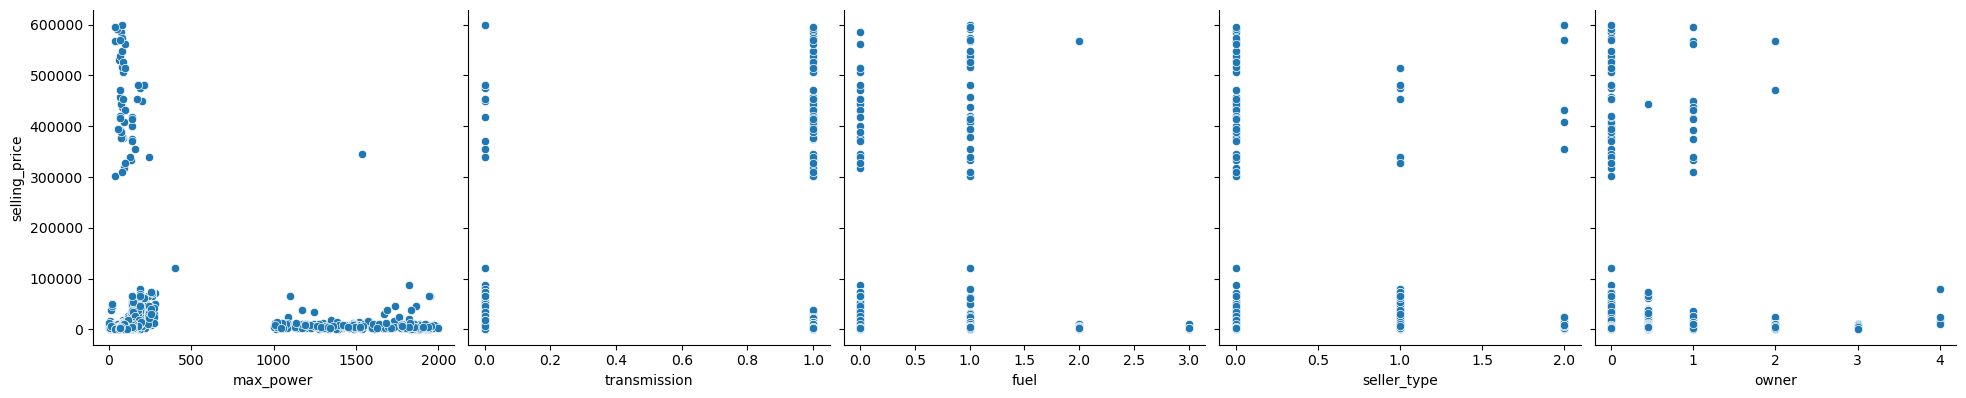

In [23]:
sns.pairplot(df_vehiculos_copy, height = 4, y_vars = 'selling_price', x_vars = ['year', 'km_driven', 'seats', 'mileage', 'engine'], kind = 'scatter')
plt.show()

sns.pairplot(df_vehiculos_copy, height = 4, y_vars = 'selling_price', x_vars = ['max_power','transmission','fuel','seller_type','owner'], kind = 'scatter')
plt.show()

## 3.Particionamiento del conjunto de datos.
Separación datos x y y para entrenamiento y x y y para test.

In [24]:
x_train, x_test, y_train,  y_test  = train_test_split(df_vehiculos_copy[variables_interes], df_vehiculos_copy['selling_price'], test_size=0.3, random_state=1)
x_train.shape, y_train.shape
x_test.shape, y_test.shape

((2135, 8), (2135,))

## 4.1 Entrenamiento de un primer modelo
Para este primer modelo solo se va a remplazar los valores nulos a la media  de todos los datos.

In [25]:
regression = LinearRegression()
regression.fit(x_train, y_train)

LinearRegression()

### 4.1.1 Interpretación de los coeficientes y del intercepto

En base a los coeficientes anteriormente mostrados, solo datos como engine, max_power, y km_driven tienen un coeficiente de puridad acceptablle .

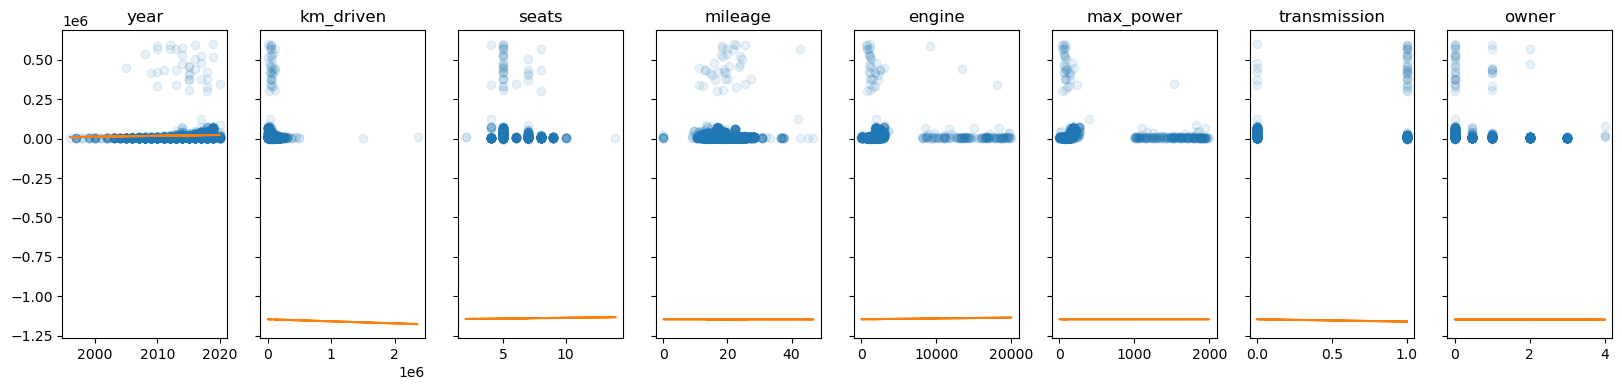

In [26]:
f, axs = plt.subplots(1, len(variables_interes), sharey = True, figsize = (20, 4))

for i in range(len(variables_interes)):
    col = variables_interes[i]
    x = x_train[col]
    m = regression.coef_[i]
    b = regression.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)
plt.show()

In [27]:
pd.DataFrame({'columns': variables_interes, 'coef': regression.coef_})

,columns,coef
0,year,579.055351
1,km_driven,-0.013002
2,seats,938.424198
3,mileage,-14.075666
4,engine,0.531126
5,max_power,0.075907
6,transmission,-14579.959728
7,owner,-508.849316


In [28]:
regression.intercept_

-1146960.3289770451

De lo anterior se puede interpretar que hay mukchos valores atipicos que no permiten detectar una relación lineal entre el precio y alguna de las caracteristicas.

### 4.1.2 Validación del modelo
### Mean Absolute Error


In [29]:
print('Train:', mean_absolute_error(y_train, regression.predict(x_train)))
print('Test:', mean_absolute_error(y_test, regression.predict(x_test)))

Train: 8661.8732727791
Test: 8753.291069825269


### Root Mean Squeared Error (RMSE)

In [30]:
 print('Train:', np.sqrt(mean_squared_error(y_train, regression.predict(x_train))))
print('Test:', np.sqrt(mean_squared_error(y_test, regression.predict(x_test))))

Train: 39343.32209481665
Test: 38298.6032732386


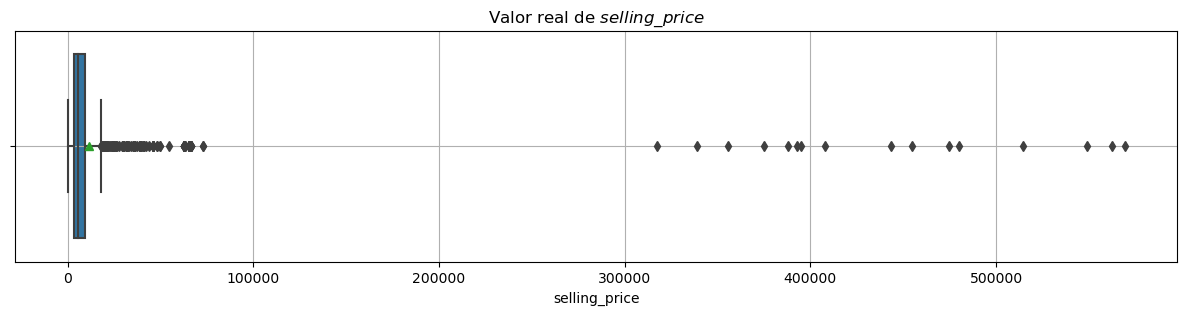

In [31]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = y_test, showmeans = True, orient = 'h')
plt.title('Valor real de $\t{selling\_price}$')
plt.grid()
plt.show()

## 4.2 Entrenamiento 2do Modelo


Para este segundo modelo se ha planteado 


### 4.2.1 Limpieza de datos para el segundo modelo
se normaliza los datos de manera que todos estén dentro del rango de 0-1.

In [32]:
def normalize_(df):    
    normalized_df=(df-df.min())/(df.max()-df.min())
    return normalized_df
        
 

In [58]:
def clean_data(df):
    df=cat_num(df)
    df=fill_na_all(df)
    df= normalize_(df)
    df = df[['year', 'km_driven', 'seats', 'mileage', 'engine','max_power','owner','transmission']]
    
    return df

In [34]:
df_vehiculos_transformed=normalize_(df_vehiculos_copy)
df_vehiculos_transformed.describe()

,Unnamed: 0,year,km_driven,owner,seller_type,seats,fuel,transmission,mileage,engine,max_power,selling_price
count,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000,7115.000000
mean,0.500705,0.768498,0.029278,0.112166,0.101195,0.284259,0.158538,0.866760,0.417026,0.091721,0.070648,0.018797
std,0.288836,0.145665,0.024213,0.174321,0.235678,0.079463,0.179482,0.339857,0.089331,0.116032,0.135231,0.066112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.250154,0.692308,0.014827,0.000000,0.000000,0.250000,0.000000,1.000000,0.358852,0.059746,0.034057,0.005559
50%,0.502153,0.769231,0.025418,0.000000,0.000000,0.250000,0.000000,1.000000,0.417026,0.066957,0.041578,0.009807
75%,0.751015,0.884615,0.038128,0.250000,0.000000,0.250000,0.333333,1.000000,0.476760,0.091721,0.055616,0.015167
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


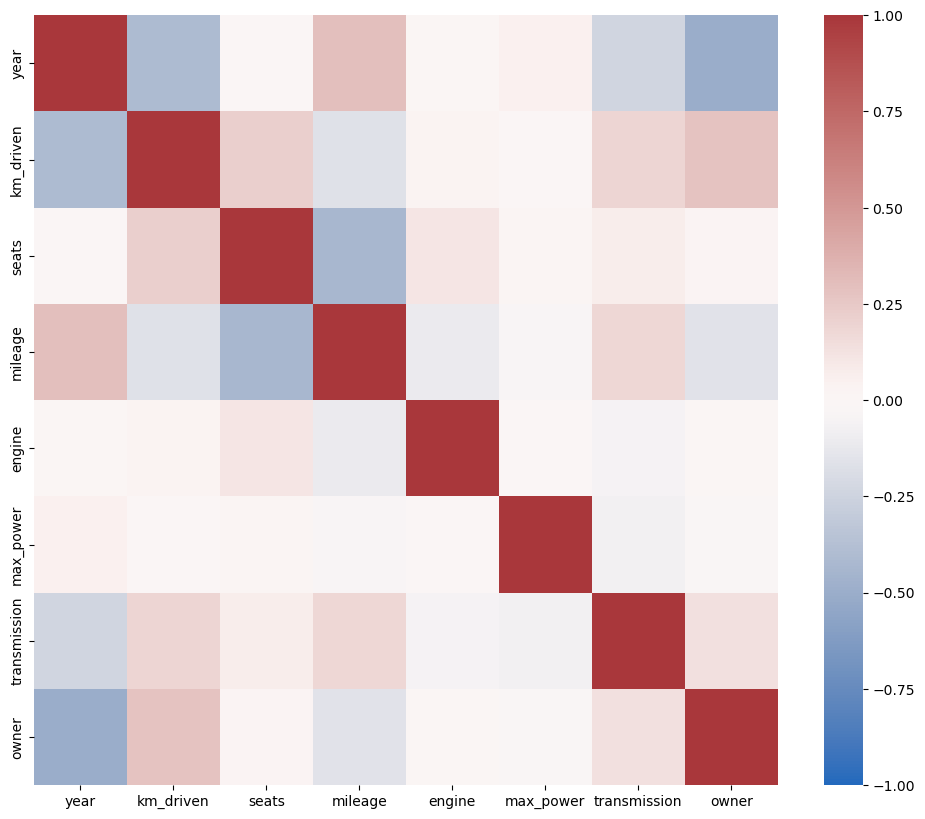

In [35]:
plt.figure(figsize = (12, 10))
sns.heatmap(df_vehiculos_transformed[variables_interes].corr(), cmap = 'vlag', vmin = -1, vmax = 1)
plt.show()

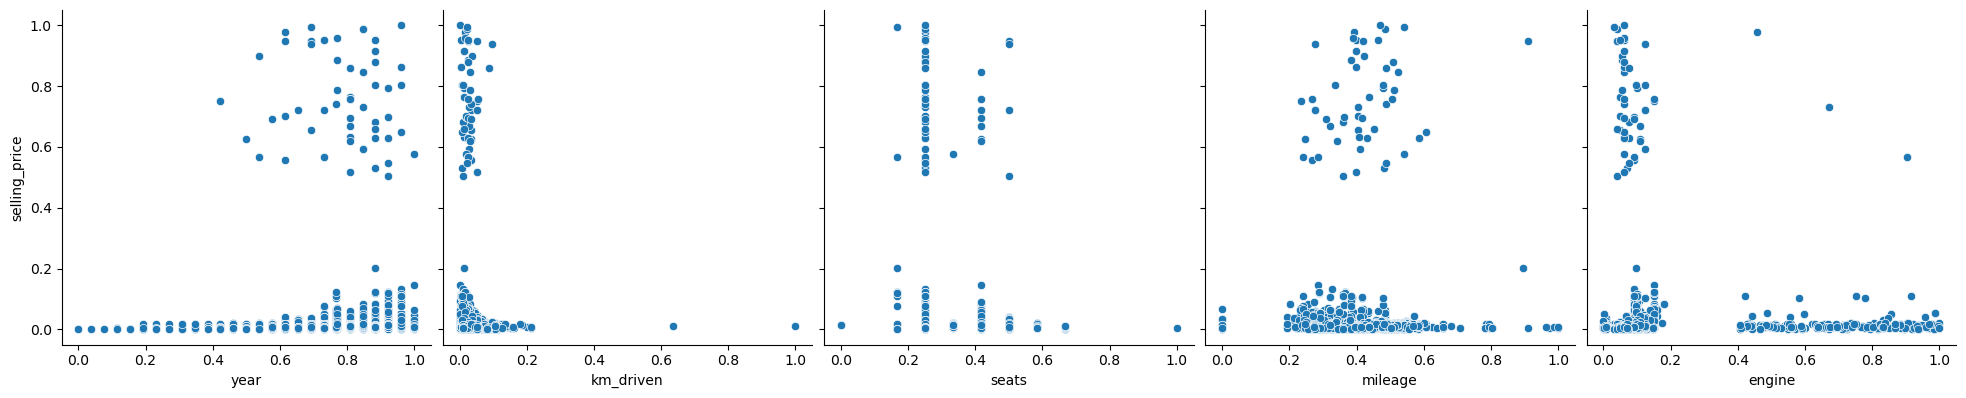

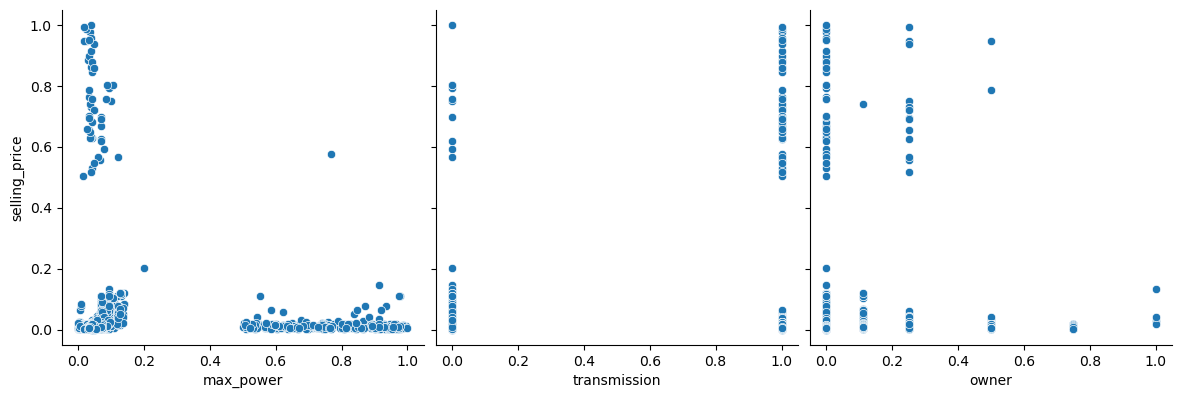

In [36]:
sns.pairplot(df_vehiculos_transformed, height = 4, y_vars = 'selling_price', x_vars = ['year', 'km_driven', 'seats', 'mileage', 'engine'], kind = 'scatter')
plt.show()
sns.pairplot(df_vehiculos_transformed, height = 4, y_vars = 'selling_price', x_vars = ['max_power','transmission','owner'], kind = 'scatter')
plt.show()

### 4.2.3 Partició de datos modelo 2

In [37]:
x_train_m2, x_test_m2, y_train_m2,  y_test_m2  = train_test_split(df_vehiculos_transformed[variables_interes], df_vehiculos_transformed['selling_price'], test_size=0.3, random_state=1)
x_train_m2.shape, y_train_m2.shape
x_test_m2.shape, y_test_m2.shape

((2135, 8), (2135,))

In [38]:
regression_2 = LinearRegression()
regression_2.fit(x_train_m2, y_train_m2)

LinearRegression()

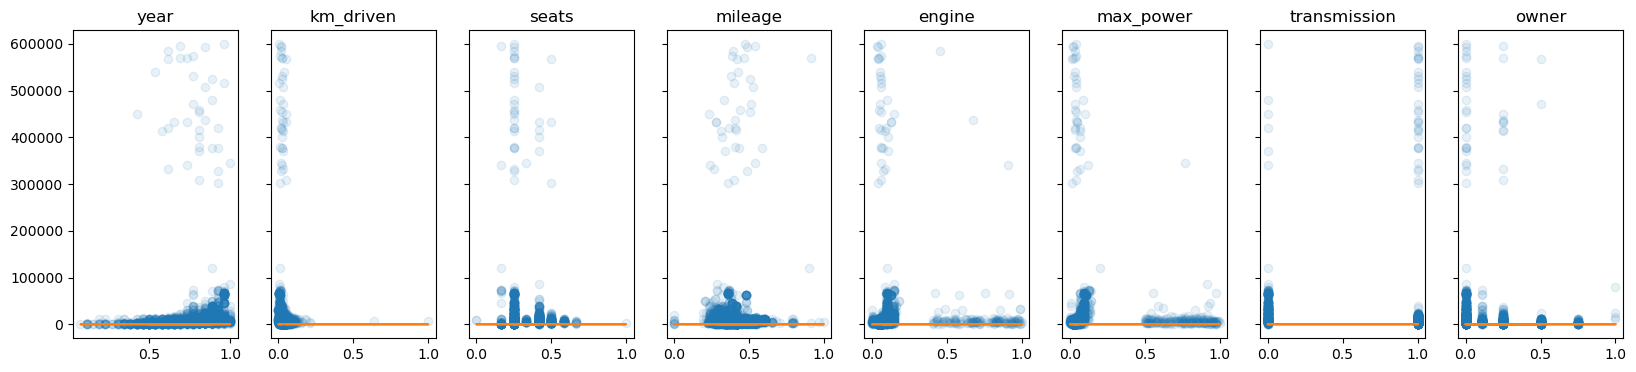

In [39]:
f, axs = plt.subplots(1, len(variables_interes), sharey = True, figsize = (20, 4))

for i in range(len(variables_interes)):
    col = variables_interes[i]
    x = x_train_m2[col]
    m = regression_2.coef_[i]
    b = regression_2.intercept_

    axs[i].plot(x, y_train, 'o', alpha = 0.1)
    axs[i].plot(x, x * m + b)
    axs[i].set_title(col)
plt.show()

In [40]:
regression_2.intercept_

0.015949025729356834

In [41]:
pd.DataFrame({'columns': variables_interes, 'coef': regression_2.coef_})

,columns,coef
0,year,0.025135
1,km_driven,-0.051239
2,seats,0.018800
3,mileage,-0.001100
4,engine,0.017706
5,max_power,0.000253
6,transmission,-0.024341
7,owner,-0.003398


### 4.2.4 Validación 2do Modelo


#### Mean Absolute Error


In [42]:
print('Train:', mean_absolute_error(y_train_m2, regression_2.predict(x_train_m2)))
print('Test:', mean_absolute_error(y_test_m2, regression_2.predict(x_test_m2)))

Train: 0.014461002282957009
Test: 0.014613624346355481


#### Root Mean Squeared Error (RMSE)

In [43]:
 print('Train:', np.sqrt(mean_squared_error(y_train_m2, regression_2.predict(x_train_m2))))
print('Test:', np.sqrt(mean_squared_error(y_test_m2, regression_2.predict(x_test_m2))))

Train: 0.06568369828501498
Test: 0.06393953962693741


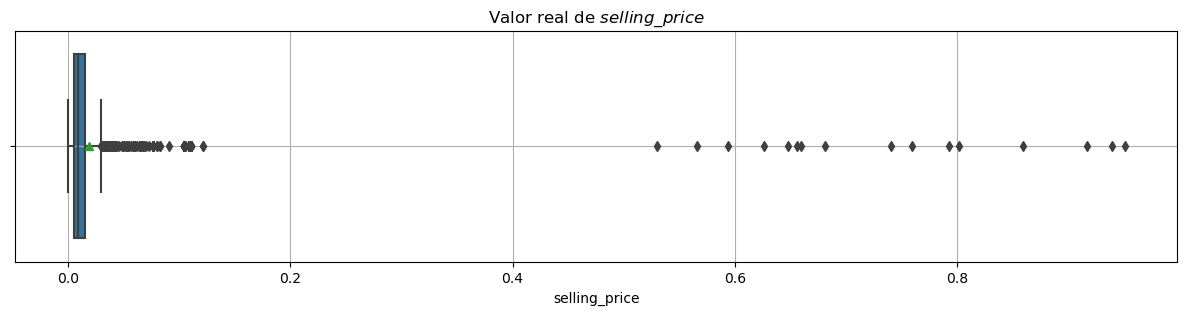

In [44]:
plt.figure(figsize = (15, 3))
sns.boxplot(x = y_test_m2, showmeans = True, orient = 'h')
plt.title('Valor real de $\t{selling\_price}$')
plt.grid()
plt.show()

# 5.1 Exploración de los supuestos Modelo 1

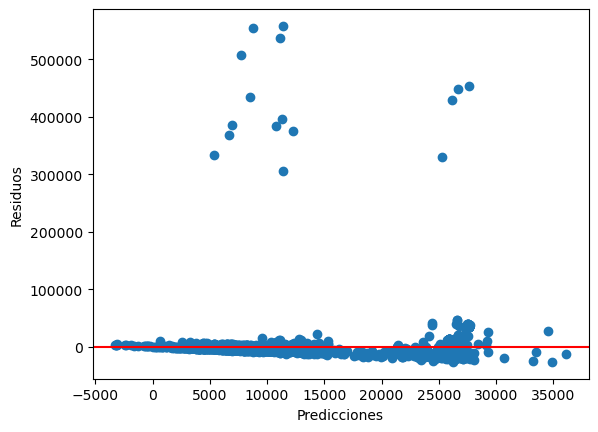

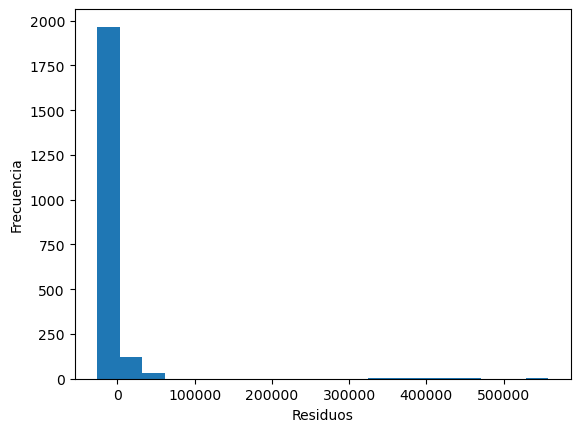

In [73]:
y_pred = regression.predict(x_test)

# Calcular los residuos
residuos = y_test - y_pred

# Graficar los residuos en función de las predicciones para verificar la homocedasticidad
plt.scatter(y_pred, residuos)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Graficar los residuos en un histograma para verificar la normalidad
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

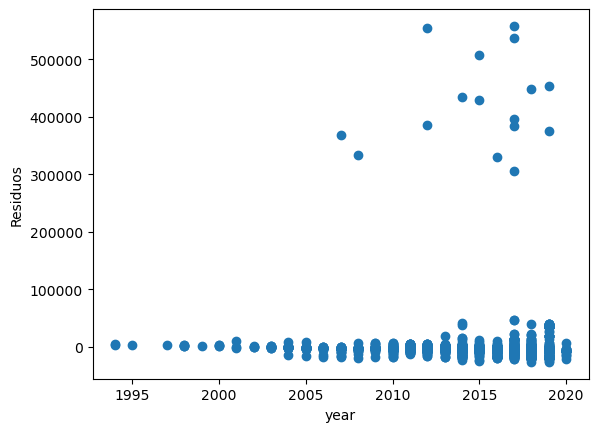

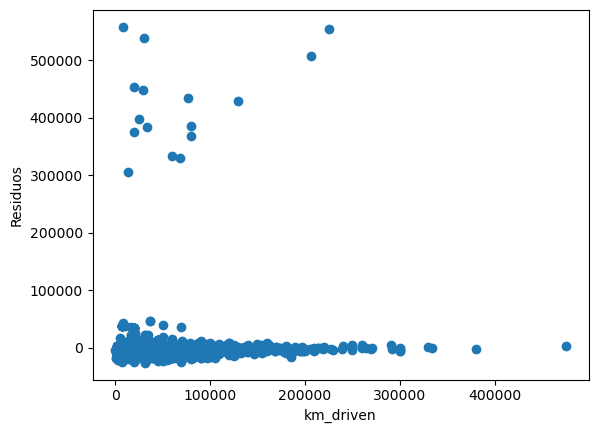

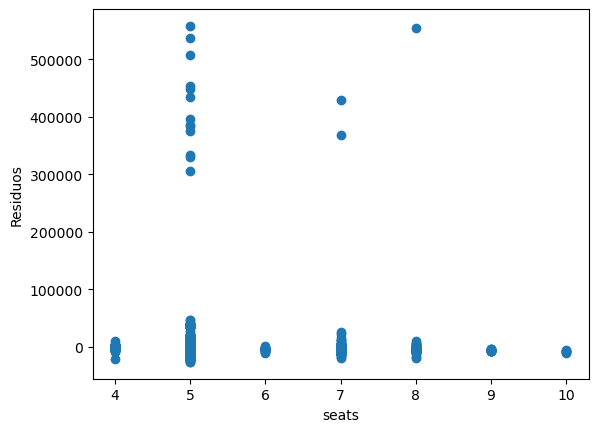

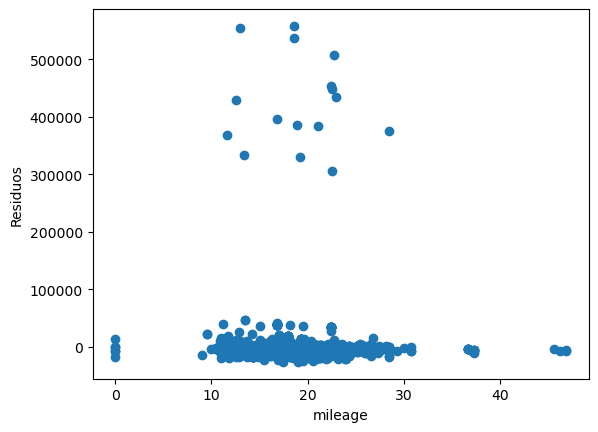

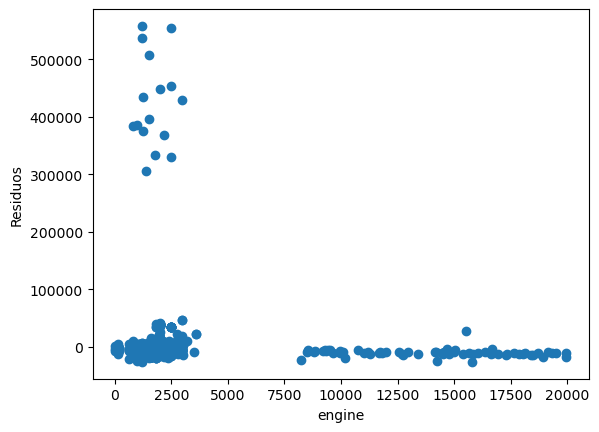

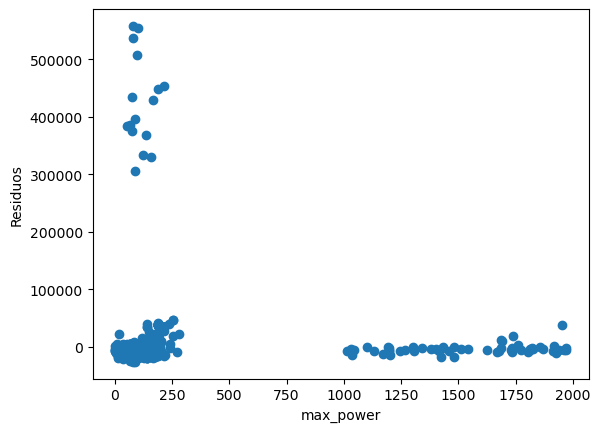

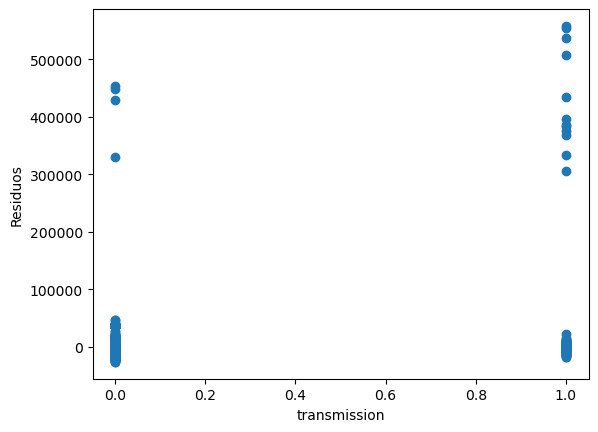

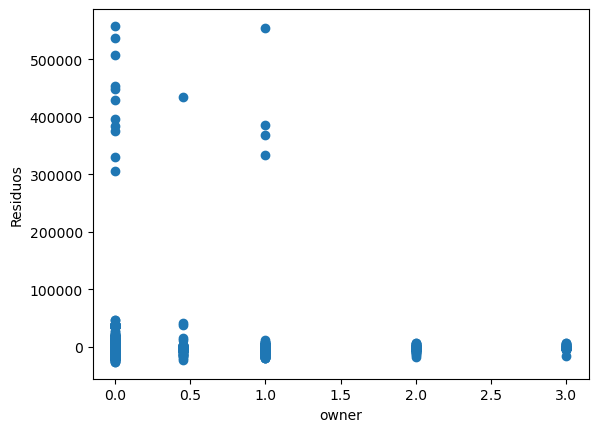

In [76]:

def _show_supuestos(var_selection, x_test):
    for i in var_selection:
        plt.scatter(x_test[i], residuos)
        plt.xlabel(i)
        plt.ylabel("Residuos")
        plt.show()
_show_supuestos( variables_interes,x_test)

# 6 Resutados transformaciones para llegar a los supuestos

El modelo 2 presenta las transformaciones necesarias para llegar a cumplir el supuesto.De forma que el residuo a disminuya significativamente haciendo que la predicción cada vez está más cerca a la realidad.

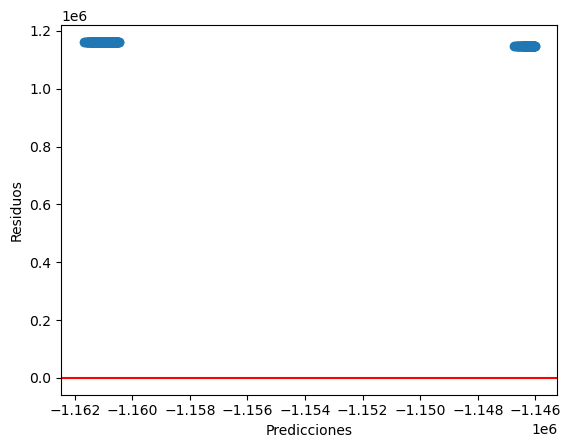

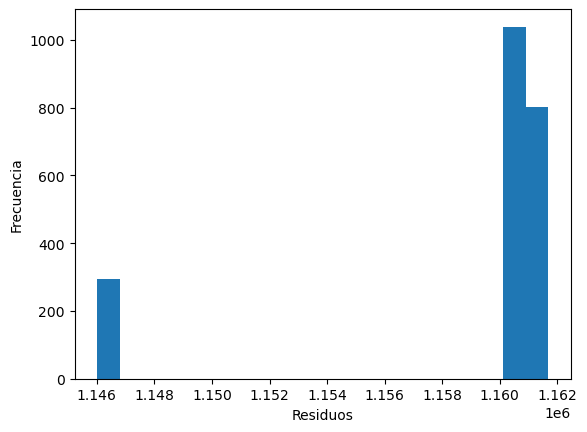

In [77]:
y_pred = regression.predict(x_test_m2)

# Calcular los residuos
residuos = y_test_m2 - y_pred

# Graficar los residuos en función de las predicciones para verificar la homocedasticidad
plt.scatter(y_pred, residuos)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.axhline(y=0, color='r', linestyle='-')
plt.show()

# Graficar los residuos en un histograma para verificar la normalidad
plt.hist(residuos, bins=20)
plt.xlabel("Residuos")
plt.ylabel("Frecuencia")
plt.show()

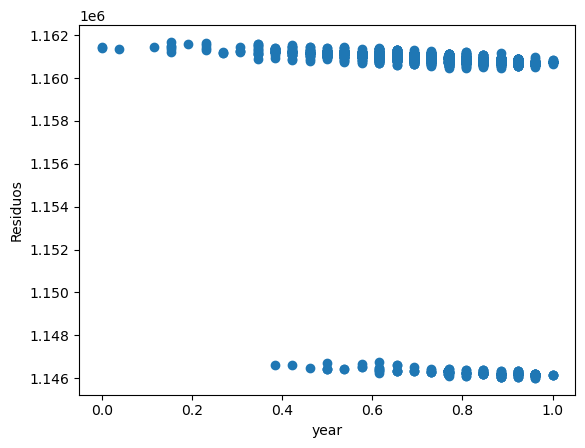

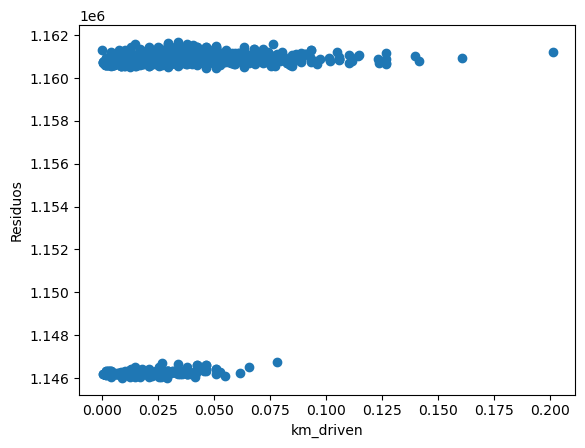

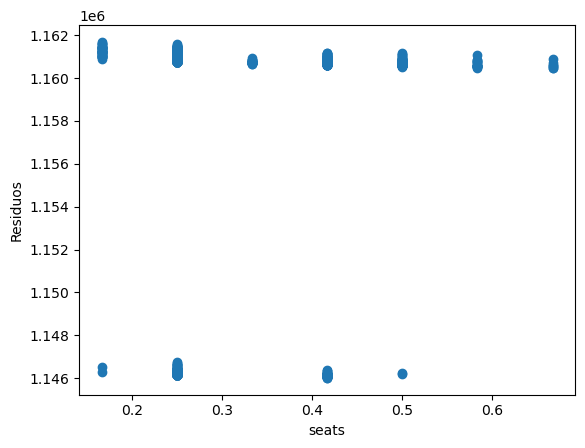

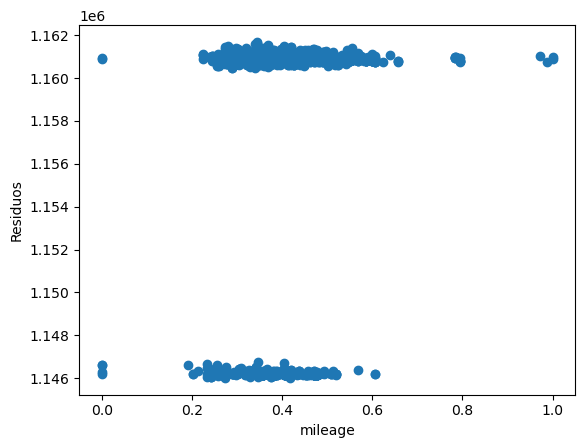

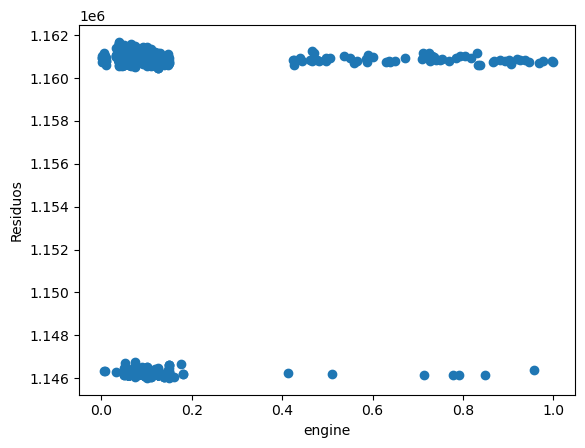

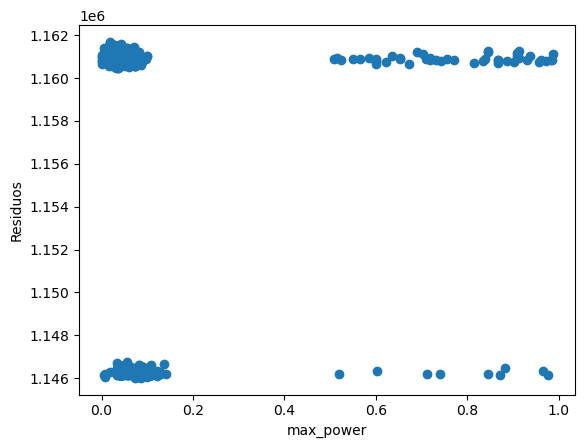

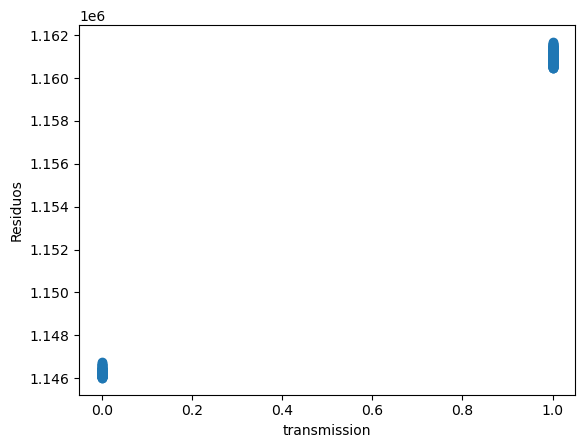

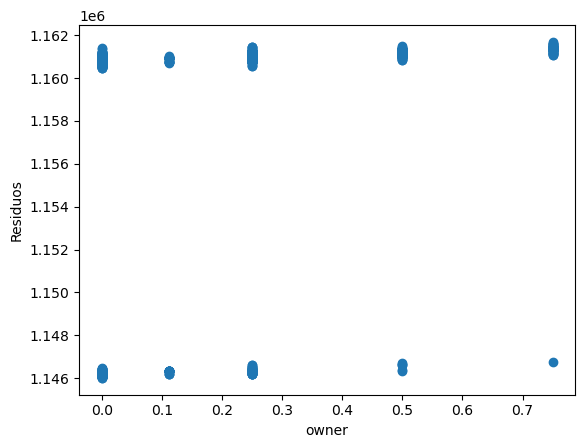

In [79]:
_show_supuestos(variables_interes,x_test_m2)

## 7. Pipeline


In [157]:

class Df_Clean_data():
        def transform(self,x):
            return clean_data(x)
        def fit(self,*args,**kwargs):
            return self

In [163]:
pipeline = Pipeline(
    [
        ('scaler', StandardScaler()),
        ('model', LinearRegression())
    ]
)

In [165]:
pipeline.fit(x_train_m2, y_train_m2)

Pipeline(steps=[('scaler', StandardScaler()), ('model', LinearRegression())])

In [166]:
pd.DataFrame({'columns': variables_interes, 'coef': pipeline['model'].coef_})

,columns,coef
0,year,0.003602
1,km_driven,-0.001314
2,seats,0.001504
3,mileage,-0.000097
4,engine,0.002059
5,max_power,0.000036
6,transmission,-0.008227
7,owner,-0.000588


In [87]:
pipeline['model'].intercept_

0.018787520339353124

In [88]:
print('MAE:')
print('Train:', mean_absolute_error(y_train_m2, pipeline.predict(x_train_m2)))
print('Test:', mean_absolute_error(y_test_m2, pipeline.predict(x_test_m2)))
print('\nRMSE:')
print('Train:', np.sqrt(mean_squared_error(y_train_m2, pipeline.predict(x_train_m2))))
print('Test:', np.sqrt(mean_squared_error(y_test_m2, pipeline.predict(x_test_m2))))

MAE:
Train: 0.014461002282957014
Test: 0.014613624346355483

RMSE:
Train: 0.06568369828501498
Test: 0.06393953962693741


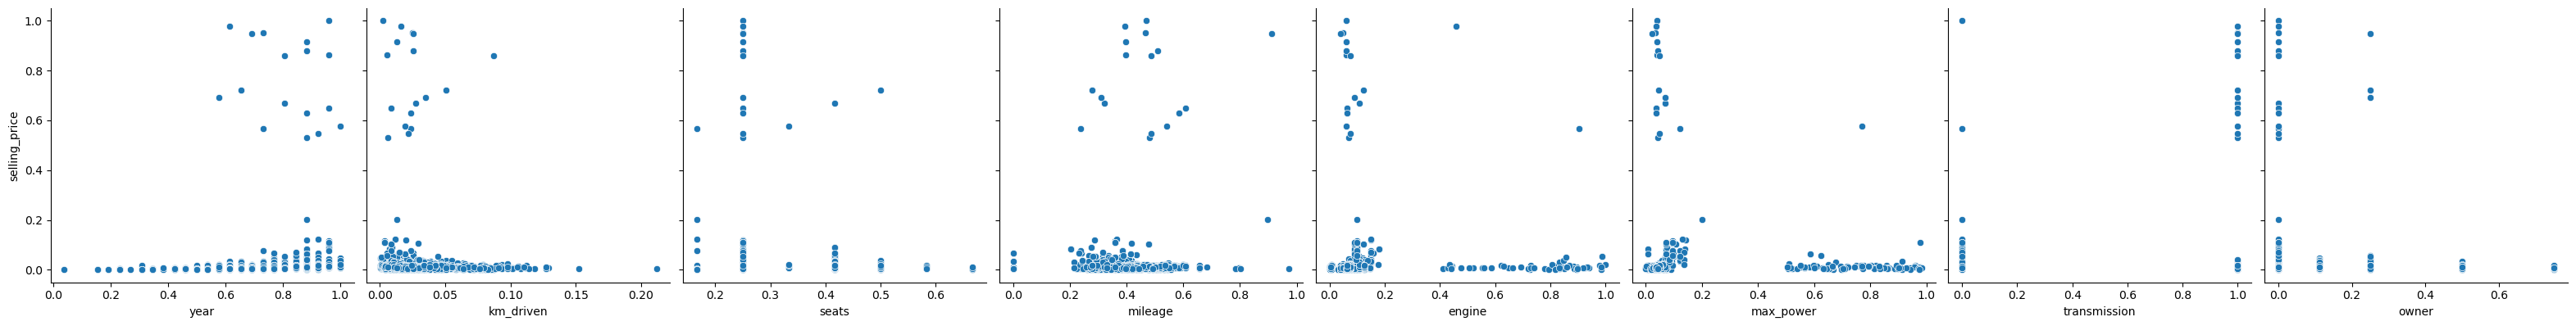

In [89]:
sns.pairplot(df_vehiculos_transformed.sample(2000), height = 4, y_vars = 'selling_price', x_vars = variables_interes, kind = 'scatter')
plt.show()

In [90]:
from sklearn.pipeline import Pipeline
from joblib import dump

dump(pipeline, 'modelo.joblib')

['modelo.joblib']

## 8. Resultados del modelo al estimar el conjunto 
A continuación se presenta la predicción usando todos los modelos planteados 


In [96]:
df_vehiculos_test_final = pd.read_csv('./data/MotorAlpes_test.csv', sep=',', encoding = 'utf-8')
df_vehiculos_test_final.shape

(791, 11)

In [97]:
df_vehiculos_test_final[  variables_interes].isnull().sum() / df_vehiculos_test_final.shape[0]


year            0.034134
km_driven       0.027813
seats           0.000000
mileage         0.027813
engine          0.035398
max_power       0.036662
transmission    0.000000
owner           0.034134
dtype: float64

In [168]:
#Limpieza de los datos
df_vehiculos_test_final=clean_data(df_vehiculos_test_final)



[0 1]


In [170]:
pipeline.predict(df_vehiculos_test_final)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names must be in the same order as they were in fit.

  warnings.warn(message, FutureWarning)


array([ 0.02449032,  0.04506904,  0.01752083,  0.03550137,  0.02000341,
        0.01593054,  0.02578666,  0.02750746,  0.01681069,  0.0175995 ,
        0.03306212,  0.03603637,  0.03231943,  0.0371268 ,  0.03136796,
        0.02117614,  0.02667629,  0.0338102 ,  0.00950446,  0.02648456,
        0.03879742,  0.03724147,  0.01818382,  0.04392606,  0.04156347,
        0.02126003,  0.03280348,  0.03304448,  0.02682345,  0.03712417,
        0.02260917,  0.0449411 ,  0.03759686,  0.03381184,  0.03733176,
        0.03923932,  0.03277727,  0.03423954,  0.01014438,  0.0341693 ,
        0.04279647,  0.02504468,  0.02139261,  0.02533878,  0.02231494,
        0.01734198,  0.02100544,  0.03533387,  0.02720262,  0.04064592,
        0.02738354,  0.01119168,  0.04337351,  0.02587814,  0.03972153,
        0.02262121,  0.03291613,  0.03987865,  0.01789828,  0.04392606,
        0.02829161,  0.04007701, -0.00583074,  0.02605021,  0.01328912,
        0.02700221,  0.03552113,  0.03308974,  0.03407444,  0.00